# Make basic plots

## Importing packages

In [1]:
from coffea import hist
from coffea.analysis_objects import JaggedCandidateArray
import coffea.nanoevents.methods
import coffea.processor as processor
import awkward1 as ak
import numpy as np
import matplotlib.pyplot as plt
import os, sys, time, uproot_methods.classes.TVector3

## Global configuration

In [3]:
# Add coffea packages to the import path
venv_path=os.environ['VIRTUAL_ENV']
site_path=venv_path+"/lib/python3.6/site-packages/"
sys.path.insert(0, site_path)

# Add local packages to the import path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Dask settings
useDask = False
if useDask:
    from distributed import Client
    client = Client('coffea-dask.fnal.gov:8786')

# Print settings
verbose = False

In [4]:
iD = "root://cmseos.fnal.gov//store/user/keanet/CondorOutput/tchannel/BkgNtuples/MCRoot/"

sample_dict16 = {
    'QCD16': [
        iD+'QCD16_Pt_1000to1400.root',iD+'QCD16_Pt_120to170.root',iD+'QCD16_Pt_1400to1800.root',
        iD+'QCD16_Pt_170to300.root',iD+'QCD16_Pt_1800to2400.root',iD+'QCD16_Pt_2400to3200.root',
        iD+'QCD16_Pt_300to470.root',iD+'QCD16_Pt_3200toInf.root',iD+'QCD16_Pt_470to600.root',
        iD+'QCD16_Pt_600to800.root',iD+'QCD16_Pt_800to1000.root',iD+'QCD16_Pt_80to120.root',
    ],
    'TTJets16': [
        iD+'TTJets16_DiLept.root',iD+'TTJets16_DiLept_genMET_150.root',iD+'TTJets16_HT_1200to2500.root',
        iD+'TTJets16_HT_2500toInf.root',iD+'TTJets16_HT_600to800.root',iD+'TTJets16_HT_800to1200.root',
        iD+'TTJets16_MC.root',iD+'TTJets16_SingleLeptFromT.root',iD+'TTJets16_SingleLeptFromT_genMET_150.root',
        iD+'TTJets16_SingleLeptFromTbar.root',iD+'TTJets16_SingleLeptFromTbar_genMET_150.root',        
    ],
    'WJets16': [
        iD+'WJets16_HT_100to200.root',iD+'WJets16_HT_1200to2500.root',iD+'WJets16_HT_200to400.root',
        iD+'WJets16_HT_2500toInf.root',iD+'WJets16_HT_400to600.root',iD+'WJets16_HT_600to800.root',
        iD+'WJets16_HT_800to1200.root'       
    ],
    'ZJets16': [
        iD+'ZJets16_HT_100to200.root',iD+'ZJets16_HT_1200to2500.root',iD+'ZJets16_HT_200to400.root',
        iD+'ZJets16_HT_2500toInf.root',iD+'ZJets16_HT_400to600.root',iD+'ZJets16_HT_600to800.root',
        iD+'ZJets16_HT_800to1200.root'         
    ]
              }

sample_dict17 = {
    'QCD17': [
        iD+'QCD17_Pt_1000to1400.root',iD+'QCD17_Pt_120to170.root',iD+'QCD17_Pt_1400to1800.root',
        iD+'QCD17_Pt_170to300.root',iD+'QCD17_Pt_1800to2400.root',iD+'QCD17_Pt_2400to3200.root',
        iD+'QCD17_Pt_300to470_01.root',iD+'QCD17_Pt_300to470_02.root',iD+'QCD17_Pt_300to470_03.root',
        iD+'QCD17_Pt_3200toInf.root',iD+'QCD17_Pt_470to600.root',iD+'QCD17_Pt_600to800_01.root',
        iD+'QCD17_Pt_600to800_02.root',iD+'QCD17_Pt_600to800_03.root',iD+'QCD17_Pt_800to1000_01.root',
        iD+'QCD17_Pt_800to1000_02.root',iD+'QCD17_Pt_800to1000_03.root',iD+'QCD17_Pt_80to120.root',
    ],
    'TTJets17': [
        iD+'TTJets17_DiLept.root',iD+'TTJets17_DiLept_genMET_150.root',iD+'TTJets17_HT_1200to2500.root',
        iD+'TTJets17_HT_2500toInf.root',iD+'TTJets17_HT_600to800_01.root',iD+'TTJets17_HT_600to800_02.root',
        iD+'TTJets17_HT_600to800_03.root',iD+'TTJets17_HT_800to1200.root',iD+'TTJets17_MC.root',
        iD+'TTJets17_SingleLeptFromT.root',iD+'TTJets17_SingleLeptFromT_genMET_150.root',        
        iD+'TTJets17_SingleLeptFromTbar.root',iD+'TTJets17_SingleLeptFromTbar_genMET_150.root'
    ],  
    'WJets17': [
        iD+'WJets17_HT_100to200.root',iD+'WJets17_HT_1200to2500.root',iD+'WJets17_HT_200to400.root',
        iD+'WJets17_HT_2500toInf.root',iD+'WJets17_HT_400to600.root',iD+'WJets17_HT_600to800.root',
        iD+'WJets17_HT_800to1200.root'       
    ],
    'ZJets17': [
        iD+'ZJets17_HT_100to200.root',iD+'ZJets17_HT_1200to2500.root',iD+'ZJets17_HT_200to400.root',
        iD+'ZJets17_HT_2500toInf.root',iD+'ZJets17_HT_400to600.root',iD+'ZJets17_HT_600to800.root',
        iD+'ZJets17_HT_800to1200.root'         
    ]
              }

sample_dict18PRE = {
    'QCD18PRE': [
        iD+'QCD18PRE_Pt_1000to1400.root',iD+'QCD18PRE_Pt_120to170.root',iD+'QCD18PRE_Pt_1400to1800.root',
        iD+'QCD18PRE_Pt_170to300.root',iD+'QCD18PRE_Pt_1800to2400.root',iD+'QCD18PRE_Pt_2400to3200.root',
        iD+'QCD18PRE_Pt_300to470.root',iD+'QCD18PRE_Pt_3200toInf.root',iD+'QCD18PRE_Pt_470to600.root',
        iD+'QCD18PRE_Pt_600to800_01.root',iD+'QCD18PRE_Pt_600to800_02.root',iD+'QCD18PRE_Pt_600to800_03.root',
        iD+'QCD18PRE_Pt_600to800_04.root',iD+'QCD18PRE_Pt_600to800_05.root',iD+'QCD18PRE_Pt_800to1000.root',
        iD+'QCD18PRE_Pt_80to120.root'
    ],
    'TTJets18PRE': [
        iD+'TTJets18PRE_DiLept.root',iD+'TTJets18PRE_HT_1200to2500.root',iD+'TTJets18PRE_HT_2500toInf.root',
        iD+'TTJets18PRE_HT_600to800.root',iD+'TTJets18PRE_HT_800to1200.root',iD+'TTJets18PRE_MC.root',
        iD+'TTJets18PRE_SingleLeptFromT.root',iD+'TTJets18PRE_SingleLeptFromTbar.root'
    ],  
    'WJets18PRE': [
        iD+'WJets18PRE_HT_100to200.root',iD+'WJets18PRE_HT_1200to2500.root',iD+'WJets18PRE_HT_200to400.root',
        iD+'WJets18PRE_HT_2500toInf.root',iD+'WJets18PRE_HT_400to600.root',iD+'WJets18PRE_HT_600to800.root',
        iD+'WJets18PRE_HT_800to1200.root'       
    ],
    'ZJets18PRE': [
        iD+'ZJets18PRE_HT_100to200.root',iD+'ZJets18PRE_HT_1200to2500.root',iD+'ZJets18PRE_HT_200to400.root',
        iD+'ZJets18PRE_HT_2500toInf.root',iD+'ZJets18PRE_HT_400to600.root',iD+'ZJets18PRE_HT_600to800.root',
        iD+'ZJets18PRE_HT_800to1200.root'         
    ]
              }

sample_dict18POST = {
    'QCD18POST': [
        iD+'QCD18POST_Pt_1000to1400.root',iD+'QCD18POST_Pt_120to170.root',iD+'QCD18POST_Pt_1400to1800.root',
        iD+'QCD18POST_Pt_170to300.root',iD+'QCD18POST_Pt_1800to2400.root',iD+'QCD18POST_Pt_2400to3200.root',
        iD+'QCD18POST_Pt_300to470.root',iD+'QCD18POST_Pt_3200toInf.root',iD+'QCD18POST_Pt_470to600.root',
        iD+'QCD18POST_Pt_600to800_01.root',iD+'QCD18POST_Pt_600to800_02.root',iD+'QCD18POST_Pt_600to800_03.root',
        iD+'QCD18POST_Pt_800to1000.root',iD+'QCD18POST_Pt_80to120.root'
    ], 
    'TTJets18POST': [
        iD+'TTJets18POST_DiLept.root',iD+'TTJets18POST_HT_1200to2500.root',iD+'TTJets18POST_HT_2500toInf.root',
        iD+'TTJets18POST_HT_600to800.root',iD+'TTJets18POST_HT_800to1200.root',iD+'TTJets18POST_MC.root',
        iD+'TTJets18POST_SingleLeptFromT.root',iD+'TTJets18POST_SingleLeptFromTbar.root'
    ],  
    'WJets18POST': [
        iD+'WJets18POST_HT_100to200.root',iD+'WJets18POST_HT_1200to2500.root',iD+'WJets18POST_HT_200to400.root',
        iD+'WJets18POST_HT_2500toInf.root',iD+'WJets18POST_HT_400to600.root',iD+'WJets18POST_HT_600to800.root',
        iD+'WJets18POST_HT_800to1200.root'       
    ],
    'ZJets18POST': [
        iD+'ZJets18POST_HT_100to200.root',iD+'ZJets18POST_HT_1200to2500.root',iD+'ZJets18POST_HT_200to400.root',
        iD+'ZJets18POST_HT_2500toInf.root',iD+'ZJets18POST_HT_400to600.root',iD+'ZJets18POST_HT_600to800.root',
        iD+'ZJets18POST_HT_800to1200.root'         
    ]
              }

## Get the sample data

## Setup the processor

In [11]:
class EMJProcessor(processor.ProcessorABC):

#     class Charge(Enum):
#         FAILED = -1
#         NEUTRAL = 0
#         CHARGED = 1
    
    def __init__(self):
        dataset_axis = hist.Cat("dataset", "Primary dataset")
        pt_axis = hist.Bin("pt", r"$p_{T}$ [GeV]", 40, 0, 3500)
        eta_axis = hist.Bin("eta", r"$\eta$", 15, -7, 7)
        phi_axis = hist.Bin("phi", r"$\phi$",15, -3.2, 3.2)
        mass_axis = hist.Bin("mass", "mass [GeV]",40,0,1200)
        
        self._accumulator = processor.dict_accumulator({
            # Reco jet plots
            'jtpt':hist.Hist("Counts", dataset_axis, pt_axis),
            'jteta':hist.Hist("Counts", dataset_axis, eta_axis),
            'jtphi':hist.Hist("Counts", dataset_axis, phi_axis),
            'jtmass':hist.Hist("Counts", dataset_axis, mass_axis),
            
            # Simple accumulators
            'cutflow': processor.defaultdict_accumulator(int),
        })
    
    @property
    def accumulator(self):
        return self._accumulator
    
    def process(self, df):
        output = self.accumulator.identity()

        dataset = df['dataset']
        
        Jets = JaggedCandidateArray.candidatesfromcounts(
            df['nAK8Jets'],
            pt=df['AK8Jets_Pt'],
            eta=df['AK8Jets_Eta'],
            phi=df['AK8Jets_Phi'],
            mass=df['AK8Jets_M']
        )    
        
        
        evtweights = df["weightedLumi"].reshape(-1, 1).flatten()
        output['cutflow']['all events'] += Jets.size
        
        twoFJets = (Jets.counts >= 2)
        Jets = Jets[twoFJets].distincts()
        FJetsPt = (Jets.i0['pt'] > 200 and Jets.i1['pt'] > 200)
        Jets = Jets[FJetsPt]
        
        output['jtpt'].fill(dataset=dataset, pt=Jets.pt.flatten())
        output['jteta'].fill(dataset=dataset, eta=Jets.eta.flatten())
        output['jtphi'].fill(dataset=dataset, phi=Jets.phi.flatten())
        output['jtmass'].fill(dataset=dataset, mass=Jets.p4.mass.flatten())

        return output

    def postprocess(self, accumulator):
        return accumulator

In [12]:
tstart = time.time() 

if not useDask:
    output = processor.run_uproot_job(sample_dict16,
                                      treename='bkg_tree',
                                      processor_instance=EMJProcessor(),
                                      executor=processor.iterative_executor,
                                      executor_args={
                                          'skipbadfiles':True,
                                          'nano':False, 
                                          'flatten':True, 
                                          'workers': 4},
                                      chunksize=50000,
                                     )
else:
    output = processor.run_uproot_job(sample_dict16,
                                      treename='bkg_tree',
                                      processor_instance=EMJProcessor(),
                                      executor=processor.dask_executor,
                                      executor_args={
                                          'skipbadfiles':True,
                                          'client': client, 
                                          'nano':False, 
                                          'flatten':True, 
                                          'workers': 2},
                                      chunksize=50000
                                     )

elapsed = time.time() - tstart
print(output)

ValueError: no column named 'pt'

In [ ]:
print("Events/s:", output['cutflow']['all events']/elapsed)

In [28]:
# Everything contained in the 'output' dictionary
output

{'jtpt': <Hist (dataset,pt) instance at 0x7f7403834e10>,
 'jteta': <Hist (dataset,eta) instance at 0x7f7403834160>,
 'jtphi': <Hist (dataset,phi) instance at 0x7f7403834c88>,
 'jtmass': <Hist (dataset,mass) instance at 0x7f74038346a0>,
 'cutflow': defaultdict_accumulator(int, {'all events': 22288690})}

In [29]:
# The cutflow accumulator
output['cutflow']

defaultdict_accumulator(int, {'all events': 22288690})

In [30]:
# List all of the processes on the 'dataset' axis for the jtpt histogram
output['jtpt'].axis('dataset').identifiers()

[<StringBin (QCD16_Mixed) instance at 0x7f740381ae10>]

## Make Plots

### Configuration

In [31]:
plt.rcParams["image.cmap"] = 'Blues'

### Jet Plots

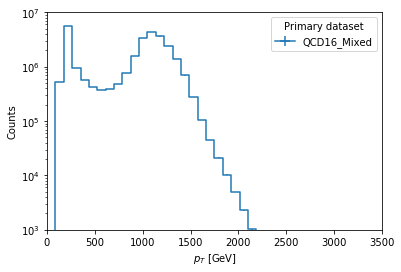

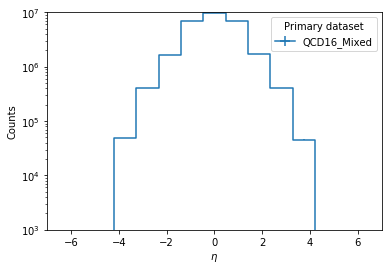

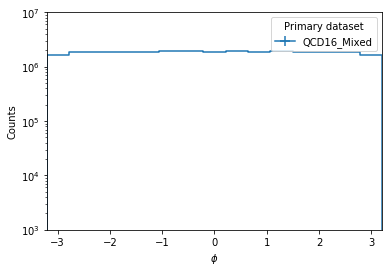

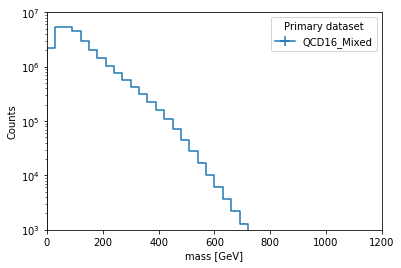

In [32]:
hnames = ['jtpt','jteta','jtphi','jtmass']
logx = [1,0,0,1]
logy = [1,0,0,1]
for ih, hname in enumerate(hnames):
    ax = hist.plot1d(output[hname], overlay="dataset", stack=False, density=False,
                      )
    plt.yscale("log")
    plt.ylim(1000, 10000000)
#     plt.xlim(-1.4,0.2)
#     plt.xscale("log")
#     if logx[ih]: plt.xscale("log")
#     if logy[ih]: 
#     for iax in ax.flatten():
#         iax.autoscale(axis='y')
    plt.show()
    

(0, 3000000)

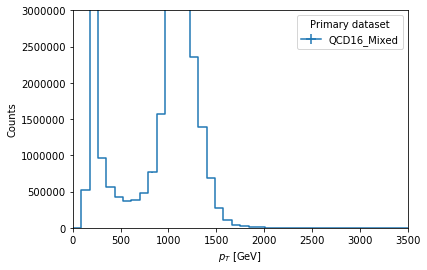

In [33]:
%matplotlib inline

ax = hist.plot1d(output['jtpt'], overlay='dataset')
ax.set_xlim(0,3500)
ax.set_ylim(0, 3000000)